<a href="https://colab.research.google.com/github/kottn/colab/blob/master/autoenc_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## kotani

In [0]:
a=3

In [27]:
a

3

## MNIST データをもってくる

In [2]:

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

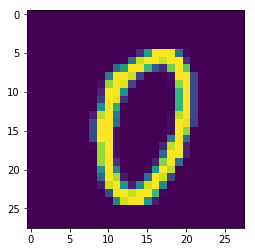

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1000])

## 前処理しとく

In [5]:
x_train.min(), x_train.max()

(0, 255)

In [6]:
x_train = x_train / 255.
x_test = x_test / 255.

x_train.min(), x_train.max()

(0.0, 1.0)

In [0]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [0]:
import copy

x_input_train = copy.deepcopy(x_train[:50000])
x_output_train = copy.deepcopy(x_train[:50000])

x_input_val = copy.deepcopy(x_train[50000:])
x_output_val = copy.deepcopy(x_train[50000:])

x_input_test = copy.deepcopy(x_test)
x_output_test = copy.deepcopy(x_test)

In [0]:

import numpy as np
import cv2

# Denoising
#x_input_train = x_input_train + np.random.random(size=x_input_train.shape) * 0.5
#x_input_val = x_input_val + np.random.random(size=x_input_val.shape) * 0.5
#x_input_test = x_input_test + np.random.random(size=x_input_test.shape) * 0.5

#x_input_train = x_input_train + np.random.random(size=x_input_train.shape) * 5.
#x_input_val = x_input_val + np.random.random(size=x_input_val.shape) * 5.
#x_input_test = x_input_test + np.random.random(size=x_input_test.shape) * 5.

# Inpainting
#x_input_train[:,:,:14,:] = np.random.random(size=[50000,28,14,1])
#x_input_val[:,:,:14,:] = np.random.random(size=[10000,28,14,1])
#x_input_test[:,:,:14,:] = np.random.random(size=[10000,28,14,1])

# Superresolution
x_input_train = np.expand_dims(np.array([cv2.resize(x, (7,7)) for x in x_input_train]), -1)
x_input_val = np.expand_dims(np.array([cv2.resize(x, (7,7)) for x in x_input_val]), -1)
x_input_test = np.expand_dims(np.array([cv2.resize(x, (7,7)) for x in x_input_test]), -1)

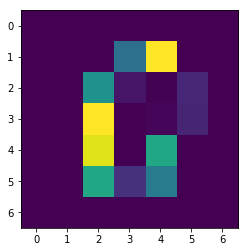

In [10]:
plt.imshow(x_input_train[1000].squeeze())

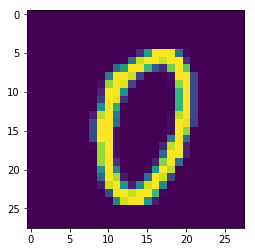

In [11]:
plt.imshow(x_output_train[1000].squeeze())

## ニューラルネットを作る

In [0]:
from keras.layers import Input, BatchNormalization, Activation, Conv2D, UpSampling2D

In [0]:
if False:
  input_tensor = Input((28,28,1))
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)
  
  
if False:
  input_tensor = Input((28,28,1))
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)
  
  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(32, (3,3), padding='same', strides=2)(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(32, (3,3), padding='same')(h)

  h = UpSampling2D()(h)  

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)
  
if False:
  input_tensor = Input((28,28,1))
  
  nb_ch = 16
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)
  
  nb_ch *= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same', strides=2)(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  nb_ch *= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same', strides=2)(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = UpSampling2D()(h)  
  nb_ch //= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = UpSampling2D()(h)
  nb_ch //= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)
  
if True:
  input_tensor = Input((7,7,1))
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)

  h = UpSampling2D()(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(32, (3,3), padding='same')(h)

  h = UpSampling2D()(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(64, (3,3), padding='same')(h)
  
  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)
  
  output_tensor = Activation('sigmoid')(h)

In [0]:
from keras.models import Model

auto_encoder = Model(input_tensor, output_tensor)

In [0]:
auto_encoder.compile(loss='mse', optimizer='adam')

In [19]:
auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7, 7, 1)           0         
_________________________________________________________________
activation_6 (Activation)    (None, 7, 7, 1)           0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 1)           4         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 16)          160       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 16)        0         
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 16)        64        
__________

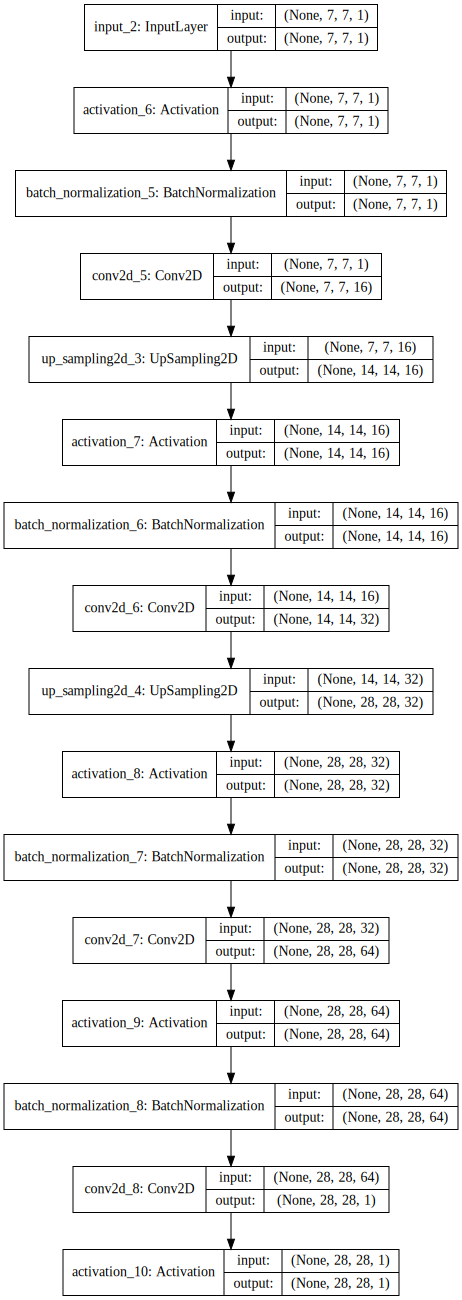

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(auto_encoder, show_shapes=True).create(prog='dot', format='svg'))

## 訓練する

In [21]:
hist = auto_encoder.fit(
    x = x_input_train,
    y = x_output_train,
    epochs = 20,
    batch_size=100,
    validation_data = (x_input_val, x_output_val),
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 312us/step - loss: 0.0373 - val_loss: 0.0401
Epoch 2/20
50000/50000 [==============================] - 12s 247us/step - loss: 0.0220 - val_loss: 0.0216
Epoch 3/20
50000/50000 [==============================] - 12s 245us/step - loss: 0.0209 - val_loss: 0.0209
Epoch 4/20
50000/50000 [==============================] - 12s 246us/step - loss: 0.0203 - val_loss: 0.0203
Epoch 5/20
50000/50000 [==============================] - 12s 246us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 6/20
50000/50000 [==============================] - 12s 246us/step - loss: 0.0196 - val_loss: 0.0198
Epoch 7/20
50000/50000 [==============================] - 12s 246us/step - loss: 0.0194 - val_loss: 0.0197
Epoch 8/20
50000/50000 [==============================] - 12s 245us/step - loss: 0.0192 - val_loss: 0.0192
Epoch 9/20
50000/50000 [==============================] - 12s 246us/step - loss: 0.0190 - val_

In [22]:
hist.history

{'loss': [0.03730327963829041,
  0.022046669967472555,
  0.020917391028255225,
  0.020285957932472228,
  0.019963064435869454,
  0.01964156873524189,
  0.019390161730349065,
  0.019191278085112572,
  0.019036479253321886,
  0.018837815687060357,
  0.018749479085206987,
  0.018612891986966133,
  0.01846751179918647,
  0.01840133546292782,
  0.018326703421771527,
  0.018228795327246188,
  0.018171185199171304,
  0.018108328480273484,
  0.018036387160420417,
  0.017983961496502162],
 'val_loss': [0.04006881084293127,
  0.02155393185093999,
  0.020872269198298453,
  0.020294208712875843,
  0.019872224349528553,
  0.019777123127132656,
  0.01971190307289362,
  0.019161391016095878,
  0.019638112094253302,
  0.018996930792927743,
  0.01885449090972543,
  0.01862391725182533,
  0.018718499559909105,
  0.0188030325435102,
  0.018583824057132006,
  0.018432454969733954,
  0.01859695902094245,
  0.018472225107252598,
  0.018249508179724216,
  0.018068696297705175]}

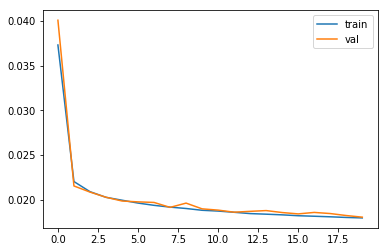

In [23]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
#plt.ylim(0.021, 0.024)

In [0]:
pred = auto_encoder.predict(x_input_test)

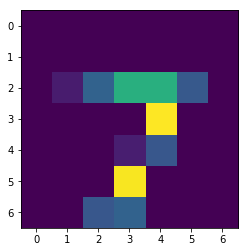

In [25]:
plt.imshow(x_input_test[0].squeeze())

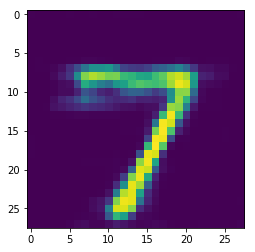

In [26]:
plt.imshow(pred[0].squeeze())

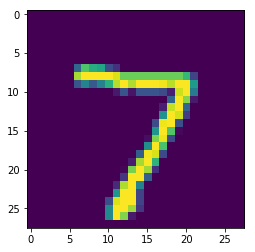

In [27]:
plt.imshow(x_output_test[0].squeeze())

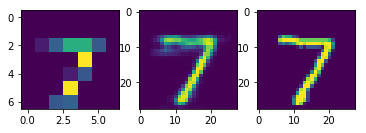

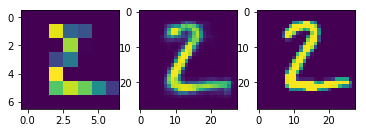

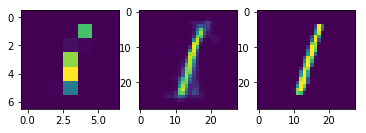

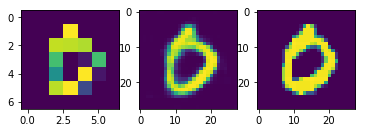

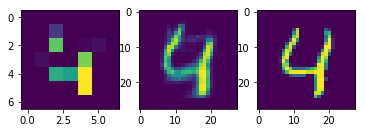

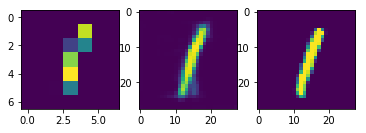

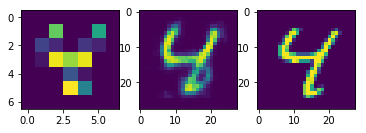

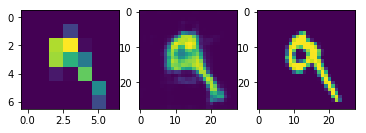

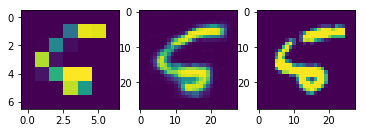

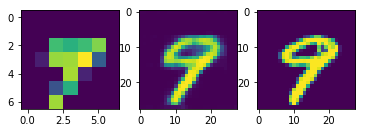

In [28]:
for x1,x2,x3 in zip(x_input_test[:10],pred[:10],x_output_test[:10]):
  plt.subplot(1,3,1)
  plt.imshow(x1.squeeze())
#  plt.clim(0,1)
  
  plt.subplot(1,3,2)
  plt.imshow(x2.squeeze())
  plt.clim(0,1)
  
  plt.subplot(1,3,3)
  plt.imshow(x3.squeeze())
  plt.clim(0,1)
  
  plt.show()